#### Práctica # 1 Análisis de Componentes Principales
## By: Luis Alberto Chavarría Zamora

### 1. Estudio sobre PCA

Sus siglas significan Principal Components Analysis (PCA) o análisis de componentes principales. Es una técnica que es usada para aplicaciones como reducción de dimensiones, compresión de datos con pérdida, extracción de características y visualización de datos. También se conoce como la transformada de Karhunen–Loève.

Se le puede dar dos definiciones:

- Proyección ortogonal de los datos sobre un espacio linear de menor dimensión, haciendo que la varianza de la información sea maximizada.
- Es la proyección lineal que minimiza el costo promedio de proyección, definida como la distancia cuadrática media entre los datos y sus proyecciones.

__Esto fue tomado de: Pattern Recognition and Machine Learning, Bishop C.__

Esto matemáticamente se puede expresar como

$x = [x_1,x_2,\ldots,x_d], x\in \mathbb{R}^d$,

donde se tiene una matriz de entrada de dimensión d, y luego

$\mathbb{\downarrow}xW, W\in \mathbb{R}^{d\times k}$,

donde se realiza la transformación para pasar de una dimensión d a una k, donde d<k, para después se obtenga

$z = [z_1,z_2,\ldots,z_k], z\in \mathbb{R}^k$,

donde gracias a la transformación se obtiene una matriz de dimensión k que es inferior.

Los pasos para aplicación son los siguientes:

1. Estandarizar el $dataset$ con dimensión d.
2. Se construye la matriz de covarianza.
3. Se descompone la matriz de covarianza en eigenvectors y eigenvalues.
4. Ordenar los eigenvalues en orden decreciente para categorizar los correspondientes eigenvectors.
5. Seleccione los k eigenvectores que corresponden a los k eigenvalues más grandes, donde k is la dimensionalidad del nuevo subespacio (k<=d).
6. Construye la matriz de proyección W de los k eigenvectors más altos.
7. Transforme el $dataset$ de entrada de dimensión d usando la matriz de proyección W para obtener las nuevas características de dimensión k.

__Esto fue tomado de: Python and Machine Learning, Raschka__
__Esto fue tomado de: Pattern Classification, Duda R., Hart. P., Stork. D.__

### 2. Casos de uso de PCA

#### Caso uno (Flores de clase Iris):

A continuación se muestra un proceso de PCA usandolo para visualización de datos:

Tomado de: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Aquí se presenta un problema donde para determinar la subespecie de la flor tipo Iris se usan cuatro características para diferenciarlas. Se ve como se usa PCA para disminuir la dimensionalidad del problema, preprocesándolos para que sea una tarea más sencilla para la etapa posterior.

In [7]:
#Se usa pandas para manejo de estructuras de datos.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#Dirección del set de datos.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Se carga el dataset como un csv, con el título de cada columna.
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
#Se imprimen las primeras 10 filas de información importada.
print(df.loc[:10,:])

    sepal length  sepal width  petal length  petal width       target
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa


In [8]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Se extraen las características de los valores
x = df.loc[:, features].values
# Se separa la columna de objetivos o targets
y = df.loc[:,['target']].values
#Se muestran los datos sin normalizar
print(x[:10,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [9]:
x = StandardScaler().fit_transform(x)
#Se imprimen los datos normalizados
print(x[:10,:])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


Es importante que la información se estandarice pues permite que la información tenga una media de cero y una desviación estándar de uno, manteniendo la integridad de la información. A continuación se muestra un ejemplo:

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_scaling_importance_001.png" alt="Alt text that describes the graphic" title="Importancia de estandarizar la información" />

__Tomado de: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py__

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
#Se imprimen las primeras dos componentes de PCA
print(finalDf)

     principal component 1  principal component 2          target
0                -2.264542               0.505704     Iris-setosa
1                -2.086426              -0.655405     Iris-setosa
2                -2.367950              -0.318477     Iris-setosa
3                -2.304197              -0.575368     Iris-setosa
4                -2.388777               0.674767     Iris-setosa
5                -2.070537               1.518549     Iris-setosa
6                -2.445711               0.074563     Iris-setosa
7                -2.233842               0.247614     Iris-setosa
8                -2.341958              -1.095146     Iris-setosa
9                -2.188676              -0.448629     Iris-setosa
10               -2.163487               1.070596     Iris-setosa
11               -2.327378               0.158587     Iris-setosa
12               -2.224083              -0.709118     Iris-setosa
13               -2.639716              -0.938282     Iris-setosa
14        

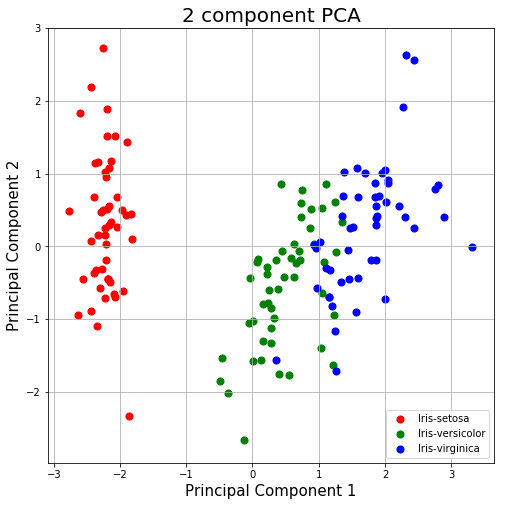

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

In [12]:
#Se procede a observar el valor de las componentes
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

<BarContainer object of 2 artists>

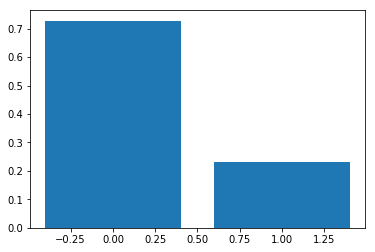

In [13]:
#
plt.bar(range(2),pca.explained_variance_ratio_)

Se puede ver como los datos que eran de 4 dimensiones pasaron a ser visualizados como datos de 2 dimensiones.

#### Caso dos (Face Decomposition):

Aquí se puede ver como se usa PCA para difuminar datos no relevantes de las caras en el dataset de Olivetti

__Tomado de:http://w10schools.com/posts/233581_Faces-dataset-decompositions__

In [14]:
print(__doc__)
 
# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause
 
import logging
from time import time
 
from numpy.random import RandomState
import matplotlib.pyplot as plt
 
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
 
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

Automatically created module for IPython interactive environment


Se cargan las caras, debe cargar 400.

In [15]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data
 
n_samples, n_features = faces.shape
 
# global centering
faces_centered = faces - faces.mean(axis=0)
 
# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)
 
print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


Se desarrolla una función para dibujar cada una de las caras

In [16]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

Se realiza cada uno de los estimadores utilizados

In [23]:
estimators = [
    #Esta descomposición usa Single Value Decomposition para proyectar la información a una menor dimensión a través de PCA
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),
]

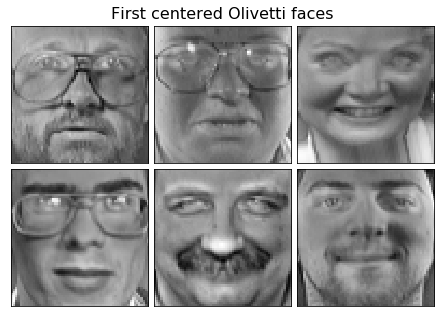

In [24]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 0.174s


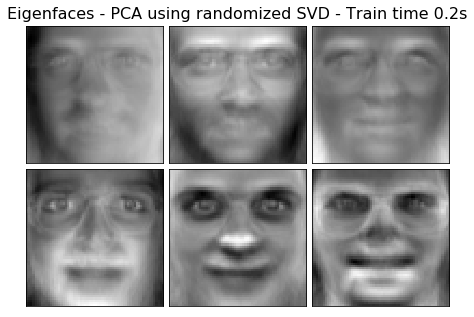

In [25]:
#Recorre los estimadores, en este caso es solo el de PCA
for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    # Entrena el modelo
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    # Define las componentes
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
    #Revisa si el atributo está presente
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.shape != ()):
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])
 
plt.show()

Se puede ver como por medio de PCA se reduce la dimensionalidad de la información, indicando las componentes más importantes y por lo tanto reduciendo el tiempo de procesamiento